In [7]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image

In [8]:
dataset= r'TrainTest.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [19]:
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [20]:
feature_names = list(data.columns[:-1])

In [21]:
# 定义符号回归模型，并使用训练数据拟合模型
reg = SymbolicRegressor(population_size=5000, generations=20, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                       'inv', 'max', 'min', 'sin', 'cos', 'tan'],
                         metric='mean absolute error', stopping_criteria=0.001,
                         random_state=0)
reg.fit(X_train, y_train)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.04          4.31486        4          1.97566              N/A     24.11s
   1     7.56          3.13566        4          1.97566              N/A     24.47s
   2    10.46          3.06317        8          1.95236              N/A     23.41s
   3     8.02          2.84901        9          1.79378              N/A     21.79s
   4     7.50          2.74517        7          1.63857              N/A     20.21s
   5     9.90          2.66146       10          1.44198              N/A     19.35s
   6    12.13          2.28748       16          1.38167              N/A     20.17s
   7    14.70          2.11431       22          1.31542              N/A     17.35s
   8    19.18          1.98145       20          1.29235              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  population_size=5000, random_state=0, stopping_criteria=0.001,
                  verbose=1)

In [23]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 1.0505289846592012


In [24]:
print(X_test.shape[1])

75


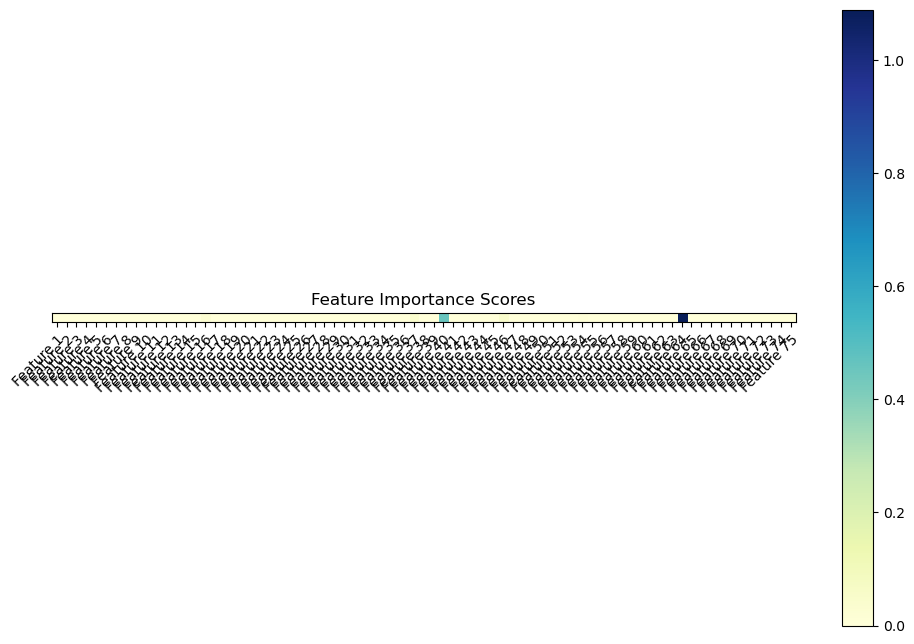

In [25]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature-importance scores
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=0)

# Create a heatmap
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(result.importances_mean.reshape(1, -1), cmap='YlGnBu')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(result.importances_mean)))
ax.set_xticklabels([f"Feature {i+1}" for i in range(len(result.importances_mean))])
ax.set_yticks([])

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Set plot title and show plot
ax.set_title("Feature Importance Scores")
plt.show()
# 这个代码会创建一个热力图，显示特征重要性分数。
# x轴显示特征编号，每个单元格的颜色表示该特征的重要性分数，颜色越亮，意味着该特征对该模型越重要。

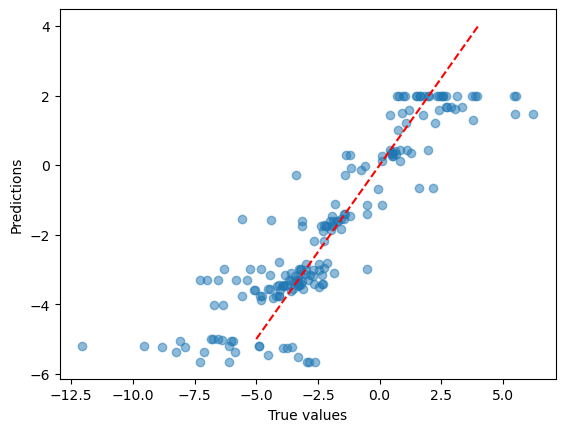

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(range(-5, 5), range(-5, 5), "r--")
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()
# 这个代码会创建一个散点图，显示模型的预测值与真实值之间的关系。
# x轴是真实值，y轴是预测值。如果模型预测完全准确，则所有点都将落在红色虚线上方，红色虚线表示完美预测的情况

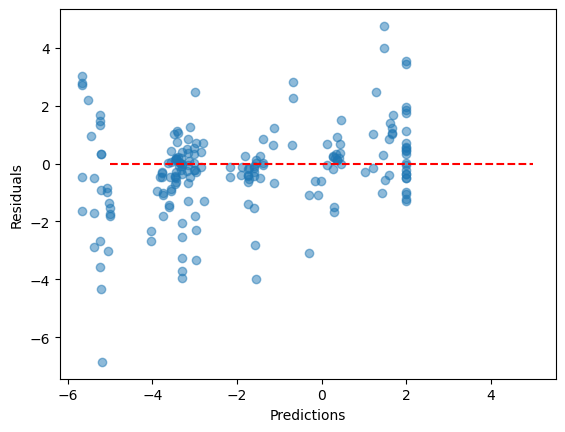

In [27]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.hlines(y=0, xmin=-5, xmax=5, colors='r', linestyles='--')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()
# 这个代码将创建一个散点图，表示预测值和残差之间的关系。
# x轴是预测值，y轴是残差。如果模型的预测值能够准确地预测目标变量，残差应该随机分布在0附近。

In [ ]:
# from sklearn.model_selection import learning_curve

# # Compute the training and test scores
# train_sizes, train_scores, test_scores = learning_curve(
#     reg, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
#     scoring='neg_mean_absolute_error')

# # Create the learning curve plot
# fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
# plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Testing score')
# plt.xlabel('Training examples')
# plt.ylabel('Score (MAE)')
# plt.ylim((-1, 1))
# plt.legend(loc='best')
# plt.show()

In [ ]:
# # 绘制预测值和真实值的散点图
# fig = plt.figure(dpi=300)
# plt.scatter(y_test, y_pred)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')

# # 绘制一条参考线，x=y，表示预测值等于真实值的情况
# plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], ls="--", c=".3")
# plt.savefig('figure.png')
# plt.show()



In [ ]:
# import sympy as sp
# import pydot
# # expr = sp.simplify(str(reg._program))
# # dot = sp.dotprint(expr, color={'node': 'green', 'leaf': 'yellow'})

# # # 可视化符号表达式树
# # graph = pydot.graph_from_dot_data(dot)[0]
# # graph.write_png('expression_tree.png')
# # graph
# # import sympy as sp
# expr = sp.simplify(str(reg._program))
# dot = sp.dotprint(expr, format='pydot')
# graph = pydot.graph_from_dot_data(dot)[0]
# for node in graph.get_nodes():
#     if node.get_shape() == 'ellipse':  # 运算节点
#         node.set_style('filled')
#         node.set_fillcolor('#FFC0CB')  # 淡粉色
#     else:  # 叶节点
#         node.set_style('filled')
#         node.set_fillcolor('#ADD8E6')  # 浅蓝色

# # 可视化符号表达式树
# graph
# graph.write_png('expression_tree.png')

In [ ]:
# print(set(str(reg._program).split()))
# #  reg._program 转换为字符串后拆分其单词并将其放入新的集合中，可能会导致仅包含单词的集合不完整，因为它缺少其他类型的符号和结构化元素。
# # 另一方面，直接打印 reg._program 可以保留其本来的结构和格式，并且不会丢失任何其他类型的符号或元素

In [ ]:
# print(reg._program)